# 一、子图
## 1. 使用 plt.subplots 绘制均匀状态下的子图
返回元素分别是画布和子图构成的列表，第一个数字为行，第二个为列

figsize 参数可以指定整个画布的大小

sharex 和 sharey 分别表示是否共享横轴和纵轴刻度

tight_layout 函数可以调整子图的相对大小使字符不会重叠

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

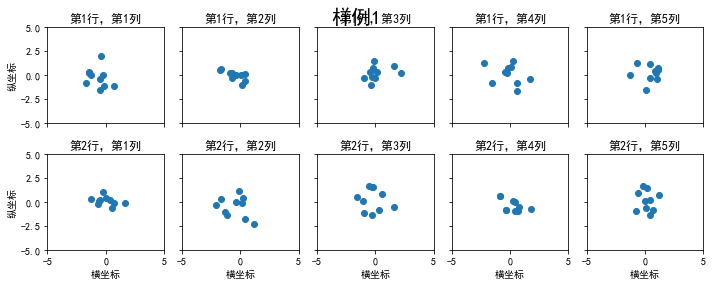

In [2]:
fig, axs = plt.subplots(2, 5, figsize=(10, 4), sharex=True, sharey=True)
fig.suptitle('样例1', size=20)
for i in range(2):
    for j in range(5):
        axs[i][j].scatter(np.random.randn(10), np.random.randn(10))
        axs[i][j].set_title('第%d行，第%d列'%(i+1,j+1))
        axs[i][j].set_xlim(-5,5)
        axs[i][j].set_ylim(-5,5)
        if i==1: axs[i][j].set_xlabel('横坐标')
        if j==0: axs[i][j].set_ylabel('纵坐标')
fig.tight_layout()

也可以通过projection方法创建极坐标系下的图表

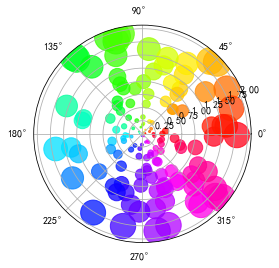

In [3]:
N = 150
r = 2 * np.random.rand(N)
theta = 2 * np.pi * np.random.rand(N)
area = 200 * r**2
colors = theta


plt.subplot(projection='polar')
plt.scatter(theta, r, c=colors, s=area, cmap='hsv', alpha=0.75)

## 2. 使用 GridSpec 绘制非均匀子图
所谓非均匀包含两层含义，第一是指图的比例大小不同但没有跨行或跨列，第二是指图为跨列或跨行状态

利用 add_gridspec 可以指定相对宽度比例 width_ratios 和相对高度比例参数 height_ratios

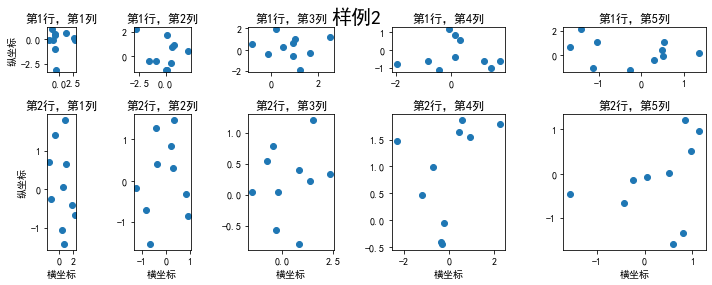

In [4]:
fig = plt.figure(figsize=(10, 4))
spec = fig.add_gridspec(nrows=2, ncols=5, width_ratios=[1,2,3,4,5], height_ratios=[1,3])
fig.suptitle('样例2', size=20)
for i in range(2):
    for j in range(5):
        ax = fig.add_subplot(spec[i, j])
        ax.scatter(np.random.randn(10), np.random.randn(10))
        ax.set_title('第%d行，第%d列'%(i+1,j+1))
        if i==1: ax.set_xlabel('横坐标')
        if j==0: ax.set_ylabel('纵坐标')
fig.tight_layout()

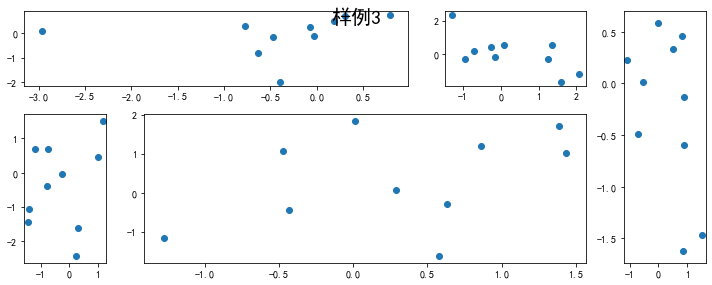

In [5]:
fig = plt.figure(figsize=(10, 4))
spec = fig.add_gridspec(nrows=2, ncols=6, width_ratios=[2,2.5,3,1,1.5,2], height_ratios=[1,2])
fig.suptitle('样例3', size=20)
# sub1
ax = fig.add_subplot(spec[0, :3])
ax.scatter(np.random.randn(10), np.random.randn(10))
# sub2
ax = fig.add_subplot(spec[0, 3:5])
ax.scatter(np.random.randn(10), np.random.randn(10))
# sub3
ax = fig.add_subplot(spec[:, 5])
ax.scatter(np.random.randn(10), np.random.randn(10))
# sub4
ax = fig.add_subplot(spec[1, 0])
ax.scatter(np.random.randn(10), np.random.randn(10))
# sub5
ax = fig.add_subplot(spec[1, 1:5])
ax.scatter(np.random.randn(10), np.random.randn(10))
fig.tight_layout()

# 二：子图上的定义方法
在 `ax` 对象上定义了和 `plt` 类似的图形绘制函数，常用的有： `plot, hist, scatter, bar, barh, pie`

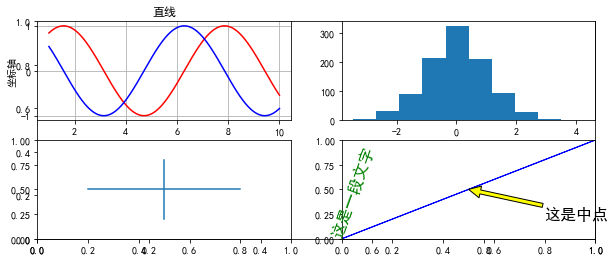

In [6]:
fig, axs = plt.subplots(figsize=(10, 4), sharex=True, sharey=True)

# plot 
x = np.linspace(1,10,1000)
y = np.sin(x)
ax1 = fig.add_subplot(221)
ax1.plot(x,np.sin(x), color = 'r');
ax1.plot(x,np.cos(x), color = 'b');
ax1.grid(True) # 绘制网格
#使用 set_xscale, set_title, set_xlabel 分别可以设置坐标轴的规度（指对数坐标等）、标题、轴名
#ax1.set_yscale('log')
ax1.set_title('直线')
ax1.set_ylabel('坐标轴')

# hist
ax2 = fig.add_subplot(222)
ax2.hist(np.random.randn(1000));

#常用直线的画法为： axhline, axvline, axline （水平、垂直、任意方向） 
ax3 = fig.add_subplot(223)
ax3.axhline(0.5,0.2,0.8);
ax3.axvline(0.5,0.2,0.8);
#ax3.axline([0.3,0.3],[0.7,0.7])

ax4 = fig.add_subplot(224)
ax4.arrow(0, 0, 1, 1, head_width=0.03, head_length=0.05, facecolor='red', edgecolor='blue');
ax4.text(x=0, y=0,s='这是一段文字', fontsize=16, rotation=70, rotation_mode='anchor', color='green');
ax4.annotate('这是中点', xy=(0.5, 0.5), xytext=(0.8, 0.2), arrowprops=dict(facecolor='yellow', edgecolor='black'), fontsize=16);

### 作业
1. 墨尔本1981年至1990年的每月温度情况

In [7]:
data = pd.read_csv('data/layout_ex1.csv')
data['Time'] = data['Time'].apply(pd.to_datetime,format='%Y-%m')
data['year'] = data['Time'].dt.year

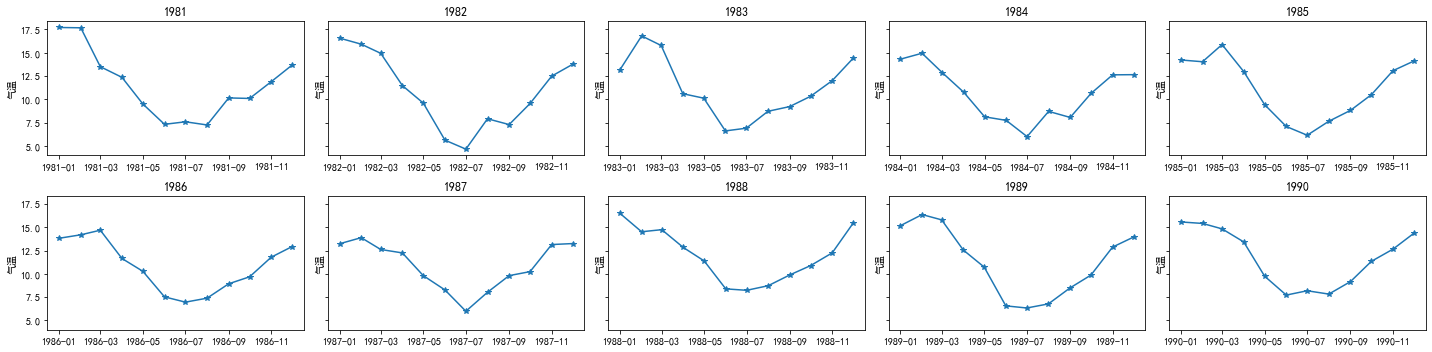

In [8]:
year_list = data['year'].unique()
fig, axs = plt.subplots(2,5,figsize=(20, 5),sharey = True)
for ax,  year in zip(axs.flat, year_list):
    df = data[data['year'] == int(year)]#.reset_index(drop = True)
    ax.plot(df['Time'], df["Temperature"], marker = '*')
    ax.set_title(year)
    ax.set_ylabel('气温')
fig.tight_layout()

2. 画出数据的散点图和边际分布     
用 np.random.randn(2, 150) 生成一组二维数据，使用两种非均匀子图的分割方法，做出该数据对应的散点图和边际分布图

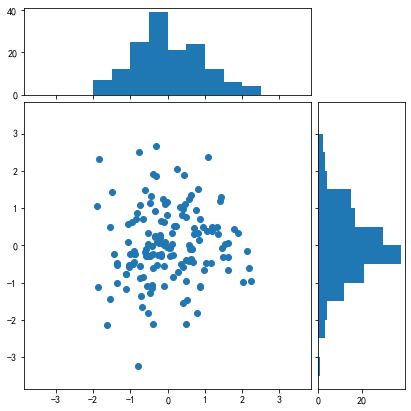

In [10]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig, ax = plt.subplots(figsize=(7, 7))

# the scatter plot:
data = np.random.randn(2, 150)
x = data[0, :]
y = data[1, :]
ax.scatter(x, y)

# Set aspect of the main axes.
ax.set_aspect(1.)

# create new axes on the right and on the top of the current axes
divider = make_axes_locatable(ax)
# below height and pad are in inches
ax_histx = divider.append_axes("top", 1.2, pad=0.1, sharex=ax)
ax_histy = divider.append_axes("right", 1.2, pad=0.1, sharey=ax)

# make some labels invisible
ax_histx.xaxis.set_tick_params(labelbottom=False)
ax_histy.yaxis.set_tick_params(labelleft=False)

# now determine nice limits by hand:
binwidth = 0.5
xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
lim = (int(xymax/binwidth) + 1)*binwidth

bins = np.arange(-lim, lim + binwidth, binwidth)
ax_histx.hist(x, bins=bins)
ax_histy.hist(y, bins=bins, orientation='horizontal')

# the xaxis of ax_histx and yaxis of ax_histy are shared with ax,
# thus there is no need to manually adjust the xlim and ylim of these
# axis.

# ax_histx.set_yticks([0, 2])
# ax_histy.set_xticks([0, 2])
plt.show(fig)

<ipython-input-11-2010966c150c>:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax_joint = fig.add_subplot(gs[1:, :-1])


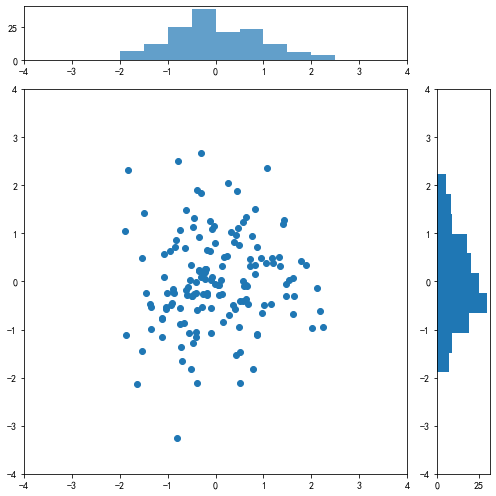

In [11]:
fig, axs = plt.subplots(figsize=(7, 7),sharey = True, frameon=False)
plt.axis('off')

gs = plt.GridSpec(6,6)

ax1 = fig.add_subplot(gs[1:, :-1])
ax1.scatter(x,y);

binwidth = 0.5
xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
lim = (int(xymax/binwidth) + 1)*binwidth

bins = np.arange(-lim, lim + binwidth, binwidth)

ax_joint = fig.add_subplot(gs[1:, :-1])

ax2 = fig.add_subplot(gs[0, :-1], sharex=ax_joint);
ax2.hist(x, bins,alpha=0.7);
ax2.set_xlim((-4,4))

ax3 = fig.add_subplot(gs[1:, -1], sharey=ax_joint);
ax3.hist(x,orientation='horizontal');
ax3.set_ylim((-4,4))


fig.tight_layout()

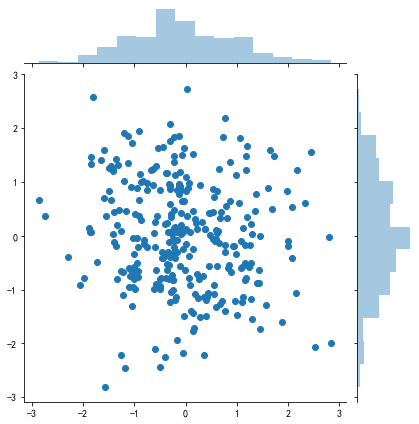

In [12]:
import seaborn as sns
data = np.random.randn(2, 150)
sns.jointplot(x=np.random.randn(2, 150), y=np.random.randn(2, 150))